# Travail personnel d'analyse numérique : Advection-Diffusion

Marine VILARIÑO FOSTIER

Rossen DIMITROV


### Question 1 

Nous définissons un nouveau système de variables $(\xi, t)$ où $\xi = z \sqrt{\frac{Ra}{4t}}$

Par la règle de dérivation en chaine, nous avons:

$$\frac{\partial}{\partial z} = \frac{\partial \xi}{\partial z}\frac{\partial}{\partial \xi} + \frac{\partial t}{\partial z}\frac{\partial}{\partial t}$$

$$\text{Où} \frac{\partial t}{\partial z} = 0 \text{  et} \frac{\partial \xi}{\partial z} = \sqrt{\frac{Ra}{4t}}$$

On obtient donc 
$$\frac{\partial}{\partial z} = \sqrt{\frac{Ra}{4t}}\frac{\partial}{\partial \xi}$$

On peut également calculer

$$\frac{\partial ^2}{\partial z^2} = \frac{\partial}{\partial z}\left(\frac{\partial \xi}{\partial z}\frac{\partial}{\partial \xi}\right) = \frac{\partial ^2}{\partial z \partial \xi}\frac{\partial \xi}{\partial z} + \frac{\partial ^2\xi}{\partial z^2}\frac{\partial}{\partial \xi}$$

où 

$$\frac{\partial ^2\xi}{\partial z^2} = 0$$

et où 

$$\frac{\partial ^2}{\partial z \partial \xi} = \frac{\partial}{\partial \xi}\frac{\partial}{\partial z} = \frac{\partial}{\partial \xi}\frac{\partial}{\partial \xi}\frac{\partial \xi}{\partial z} = \frac{\partial \xi}{\partial z}\frac{\partial ^2}{\partial \xi ^2}$$

Ce qui nous donne 

$$ \frac{\partial ^2}{\partial z^2} = \left(\frac{\partial \xi}{\partial z}\right)^2 \frac{\partial ^2}{\partial \xi ^2} = \frac{Ra}{4t} \frac{\partial ^2}{\partial \xi ^2}$$

Par la règle de dérivation en chaine, nous calculons également la dérivée en le temps dans le nouveau système de coordonnées:

$$\frac{\partial}{\partial t} = \frac{\partial \xi}{\partial t}\frac{\partial}{\partial \xi} + \frac{\partial t}{\partial t}\frac{\partial}{\partial t}$$

Où 

$$\frac{\partial t}{\partial t} = 1$$

Et où 

$$\frac{\partial \xi}{\partial t} = z \sqrt{\frac{Ra}{4}} \frac{-1}{2}t^{-\frac{3}{2}} = -z\sqrt{\frac{Ra}{4t}}\frac{1}{2t}=-\frac{\xi}{2t}$$

Ce qui nous donne donc 

$$\frac{\partial}{\partial t} = -\frac{\xi}{2t}\frac{\partial}{\partial \xi} + \frac{\partial}{\partial t}$$

Pour le changement de coordonées.

Nous pouvons maintenant remplacer ces expressions. La première équation du système nous donne:

$$\left(\frac{\partial^2}{\partial z^2}-k^2\right)w = \left(\frac{Ra}{4t}\frac{\partial^2}{\partial \xi^2}-k^2\right)w = -k^2c$$

Pour la seconde équation, le membre de gauche devient:

$$\frac{\partial c}{\partial t}-\frac{1}{Ra}\left(\frac{\partial^2}{\partial z^2}-k^2\right)c = \left(-\frac{\xi}{2t}\frac{\partial}{\partial \xi} + \frac{\partial}{\partial t}\right)c - \frac{1}{Ra}\left(\frac{Ra}{4t}\frac{\partial^2}{\partial\xi^2}-k^2\right)c =\frac{\partial c}{\partial t}-\frac{1}{t}\left(\frac{1}{4}\frac{\partial^2}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial}{\partial\xi}-\frac{k^2 t}{Ra}\right)c $$

Et nous avons directement, pour le membre de droite,

$$-\frac{\partial C_0}{\partial z}w =\frac{2}{\sqrt{\pi}}\sqrt{\frac{Ra}{4t}}e^{-\left(z\sqrt{\frac{Ra}{4t}}\right)^2}w=\sqrt{\frac{Ra}{\pi t}}e^{-\xi^2}w$$

### Question 2

In [30]:
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import exp
from math import pi

In [87]:
# Création de la matrice des xi_m
e=np.zeros(101)
for i in range (101):
    e[i]=0.05*i

In [27]:
# Construction de l'opérateur L
L1=np.zeros((101,101))
for i in range(99):
    L1[i+1,i]=1
    L1[i+1,i+1]=-2
    L1[i+1,i+2]=1
    
L2=np.zeros((101,101))
for i in range(99):
    L2[i+1,i+1]=k**2
    
L=np.dot(Ra/(4*t*(delta**2)),L1)-L2
print(L)

[[     0.              0.              0.         ...      0.
       0.              0.        ]
 [  8333.33333333 -16666.66676667   8333.33333333 ...      0.
       0.              0.        ]
 [     0.           8333.33333333 -16666.66676667 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ... -16666.66676667
    8333.33333333      0.        ]
 [     0.              0.              0.         ...   8333.33333333
  -16666.66676667   8333.33333333]
 [     0.              0.              0.         ...      0.
       0.              0.        ]]


In [88]:
# Construction de l'opérateur M:
M1=np.zeros((101,101))
for i in range(99):
    M1[i+1,i]=-1
    M1[i+1,i+1]=2
    M1[i+1,i+2]=1
M2=np.zeros((101,101))
for i in range(99):
    M2[i+1,i]=-1*e[i+1]
    M2[i+1,i+1]=0
    M2[i+1,i+2]=1*e[i+1]
M3=np.zeros((101,101))
for i in range(99):
    M3[i+1,i+1]=1

M=np.dot(1/(4*t*(delta**2)),M1)+np.dot(1/(4*(delta)),M2)+np.dot((k**2)*t/(Ra),M3)
print(M)

[[        0.           0.           0.   ...         0.           0.
          0.  ]
 [-10000000.25  20000000.    10000000.25 ...         0.           0.
          0.  ]
 [        0.   -10000000.5   20000000.   ...         0.           0.
          0.  ]
 ...
 [        0.           0.           0.   ...  20000000.    10000024.5
          0.  ]
 [        0.           0.           0.   ... -10000024.75  20000000.
   10000024.75]
 [        0.           0.           0.   ...         0.           0.
          0.  ]]


### Question 3 ###

Nous avons donc

$$f(\xi) = e^{- \xi ^2} h(\xi)$$

Et on peut calculer

$$\frac{\partial f}{\partial \xi} = -2 \xi e^{- \xi ^2}h(\xi) + e^{- \xi ^2} h'(\xi)$$
$$\frac{\partial ^2 f}{\partial \xi ^2} = e^{- \xi ^2} h''(\xi) - 4 \xi e^{- \xi ^2} h'(\xi) + (4 \xi ^2 - 2) e^{- \xi ^2} h(\xi)$$

Et l'équation aux valeurs propres $Hf = \frac{1}{4} \frac{\partial^2 f}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial f}{\partial\xi}=\alpha f $ devient donc:

$$Hf = \frac{1}{4} e^{- \xi ^2}(h''(\xi)-4\xi h'(\xi)+(4\xi^2- 2)h(\xi))+\frac{\xi}{2}e^{-\xi ^2}(h'(\xi) - 2\xi h(\xi)) = \alpha e^{-\xi ^2}h(\xi) $$

Qu'on simplifie pour obtenir

$$ h''(\xi) - 2\xi h'(\xi) = (4\alpha +2) h(\xi) $$

Cette dernière égalité est vérifiée par l'équation de Hermite pour $\lambda = -2\alpha -1$

$f$ est donc bien une fonction propre de $H$ de valeurs propres $\alpha = -\frac{\lambda + 1}{2}$

Nous utilisons les conditions aux bords pour obtenir les valeurs acceptables de $\alpha$

$f(\xi = \infty) = \lim_{\xi\to\infty} e^{-\xi^2}h(\xi) = 0$ quel que soit le degré du polynôme $h$

$f(\xi = 0) = \lim_{\xi\to 0} e^{-\xi^2}h(\xi) = h(0)$

Puisque les solutions de l'équation de Hermite sont les polynômes de Hermite des physiciens $H_\lambda(\xi)$, on a que le degré du polynôme doit être impair, pour que le terme de degré 0 soit nul.

On en déduit 
$$\lambda = 2n + 1, n \in \mathbb{N}$$

Ce qui nous permet d'obtenir 
$$\alpha = -n-1, n\in\mathbb{N}$$

Les valeurs acceptables de $\alpha$ sont donc les entiers strictement négatifs.

### Question 4

In [19]:
# Construction de la matrice des H

H=np.zeros((101,101))
for i in range(99):
    H[i+1,i]=1/(4*h**2)-e[i+1]/(4*h)
    H[i+1,i+1]=-1/(2*h**2)
    H[i+1,i+2]=1/(4*h**2)+e[i+1]/(4*h)

[[   0.      0.      0.   ...    0.      0.      0.  ]
 [  99.75 -200.    100.25 ...    0.      0.      0.  ]
 [   0.     99.5  -200.   ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ... -200.    124.5     0.  ]
 [   0.      0.      0.   ...   75.25 -200.    124.75]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


In [20]:
# Calcul des valeurs propres et vecteurs propres de H
D, V = np.linalg.eig(H)
print(D)

[-399.         -397.99999954 -396.99996223 -395.99884683 -394.98498415
 -393.90842709 -381.32800596 -383.69428059 -385.87635418 -387.8708373
 -378.78068155 -392.68964241 -376.0553717  -389.67389068 -373.15514682
 -370.08313917 -352.2635775  -356.14362884 -359.86928393 -348.23301005
 -363.43680116 -344.05594478 -339.73653659 -335.27907478 -366.84257631
 -325.96780137 -321.12321191 -316.15900532 -311.08009138 -305.89149143
 -300.59833382 -295.20584896 -289.71936446 -272.75053778 -266.94309198
 -261.06955877 -278.48616172 -255.13573747 -249.14748666 -243.11071841
 -391.28117598 -237.03139249 -230.91551051 -224.76911005 -218.59825869
 -212.40904809 -206.20758794 -200.         -193.79241206 -187.59095191
   -1.           -2.00000046   -3.00003777   -4.00115317   -5.01501585
   -6.09157291 -181.40174131   -7.31035759  -10.32610932  -12.1291627
  -14.12364582 -175.23088995  -16.30571941  -18.67199404  -21.21931845
 -150.85251334 -144.86426253 -138.93044123  -23.9446283  -133.05690801
  -99.40

In [38]:
# Tri par insertion de la matrice des valeurs propres
for i in range(len(D)):
    x = D[i]
    j = i
    while j>0 and x>D[j-1]:
        D[j]=D[j-1]
        j=j-1
    D[j]=x

# Selection des cinq plus grandes valeurs propres différentes
# (on ne regarde pas ici la dégénérescence)
eig_values = np.zeros(5)
for i in range(5):
    k=i
    while D[k] in eig_values:
        k=k+1
    eig_values[i] = D[k]
        
print(eig_values)

[-1.         -2.00000046 -3.00003777 -4.00115317 -5.01501585]


Nous obtenons les cinq premiers entiers strictement négatifs, ce qui est bien le résultat attendu analytiquement.

### Question 5

In [77]:
h=0.05
Ra=500
k=0.1
delta=0.05
t=10**-5
dt=10**-8
nb_iterations_temporelles=9000
b=-Ra/(4*(k**2))

In [78]:
C=np.zeros((99,99))
C[0,0]=b/(t*(delta**2))
C[0,1]=-(2*b)/(t*(delta**2))+1
C[98,97]=-(2*b)/(t*(delta**2))+1
C[98,98]=b/(t*(delta**2))

for i in range(97):
    C[i+1,i]=b/(t*(delta**2))
    C[i+1,i+1]=-(2*b)/(t*(delta**2))+1
    C[i+1,i+2]=b/(t*(delta**2))

In [79]:
C_inverse=np.linalg.inv(C)
Identite=C_inverse.dot(C)

In [89]:
# Chargement de la condition initiale qui représente les valeurs de c pour t=0 en chaque valeur de xi
c_i = np.load("init_cond_c.npy")


In [81]:
W=C_inverse.dot(c_i)
w=np.zeros(101)
for i in range(99):
    w[i+1]=W[i]

In [82]:
# Ecriture de la fonction qui implémente la dérivée de c
def f(cy,cyy,cyyy,t,z,wy):
    f1=cy-2*cyy+cyyy/(4*t*(delta**2))
    f2=z*(-cy+cyy)/(2*t*delta)
    f3=(k**2)*t*cy/Ra
    f4=exp(-z**2)*wy*(Ra/pi*t)**(1/2)
    f=f1+f2+f3+f4
    return f

In [90]:
T=np.zeros((nb_iterations_temporelles,101)) # matrice ayant l'evolution "spatiale" sur ses lignes, temporelles suivant les colonnes

c=np.zeros(101) # valeurs des c suivant les xi en t=t0 (premiere ligne de T)
for i in range(99):
    c[i+1]=c_i[i]
T[0,:]=c 

c1=np.ones(101) # matrice qui contiendra les valeurs de c à chaque valeur de t
c1[0]=0 # conditions de bord données a l'exercice 2
c1[100]=0


for n in range(nb_iterations_temporelles-1):  
    t1=t+dt*n
    for i in range(99): # évolution temporelle des composantes de c en utilisant Runge-Kutta d'ordre 4
        ksi=e[i+1]
        cy=c[i]
        cyy=c[i+1]
        cyyy=c[i+2]
        wy=W[i]
        
        k1=dt*f(cy,cyy,cyyy,t1,ksi,wy)
        k2=dt*f(cy+k1/2,cyy+k1/2,cyyy+k1/2,t1+dt/2,ksi,wy+k1/2)
        k3=dt*f(cy+k2/2,cyy+k2/2,cyyy+k2/2,t1+dt/2,ksi,wy+k2/2)
        k4=dt*f(cy+k3,cyy+k3,cyyy+k3,t1+dt,ksi,wy+k3)
        
        c1[i+1]=c[i+1]+(k1+2*k2+2*k3+k4)/6
       
    T[n+1,:]=c1
    c=c1


In [91]:
c0=np.zeros(101) # valeurs des c suivant les ksi en t=t0 (premiere ligne de T)
for i in range(99):
    c0[i+1]=c_i[i]

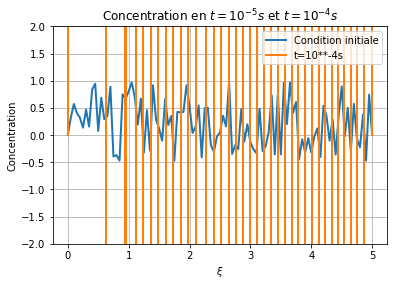

In [93]:
# Graphe des concentrations en fonction des valeurs de xi à l'instant initial et en t=10**-4
plt.title("Concentration en $t=10^{-5}s$ et $t=10^{-4}s$")
plt.xlabel('$ \\xi $')
plt.ylabel('Concentration')
plt.grid()
plt.plot(e, c0, color='C0', linestyle = '-', linewidth=2, label='Condition initiale')
plt.plot(e, c, color='C1', linestyle = '-', linewidth=2, label='t=10**-4s')
plt.legend()
plt.ylim((-2.0, 2.0))
plt.show()

In [92]:
# Valeur maximale de la concentration en t=10**-4
val_max=max(c)
print(val_max)

6.488652780902914e+49
